In [1]:
import numpy as np
import matplotlib.pylab as plt
import pandas as pd

df = pd.read_excel('SANData.xls')
df_np = df.values

In [2]:
# column averages are the estimated activity durations
data_est = np.mean(df_np,axis=0)
print(data_est)

[0.99583034 0.86443849 1.50957894 0.8678248  0.67650973]


In [10]:
# Function that returns the simulation output for the time to complete the project
# for 30 replications and given a vector of estimated mean duration times X_hat
def SANSIM(X_hat):
    Y_list = []
    for rep in range(0,30,1):
        X = []
        for i in range(0,5,1):
            X.append(np.random.exponential(X_hat[i]))
        Y = max(X[0] + X[3], X[0] + X[2] + X[4], X[1] + X[4])
        Y_list.append(Y)
    return(Y_list)

In [11]:
# Estimted project duration and standard error based on the 
# estimated durations obtained from the data
print(np.mean(SANSIM(data_est)))
print((np.std(SANSIM(data_est))**2)/30)

3.280172930820712
0.3077587794365779


In [12]:
b = 1000 # bootstrap samples
m = 50 # sample size
Yij_list = []

for i in range(0,b):
    # generate a new bootstrap sample and estimate the duration
    estimate = []
    for act in range(0,5):
        sample = np.random.choice(df_np[:,act], m)
        estimate.append(np.mean(sample))
    # run the simulation with the new estimates
    Yij_list.append(SANSIM(estimate))

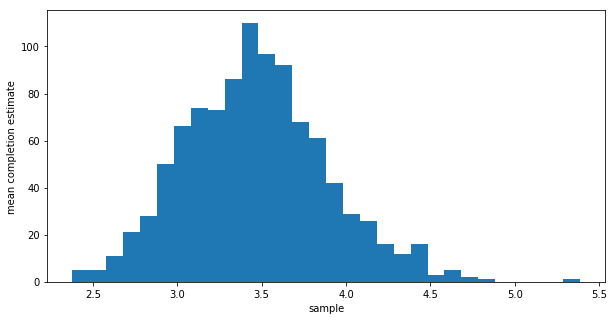

In [14]:
# plot a histogram of the estimates for different inputs
plt.figure(figsize=(10, 5))
plt.hist(np.mean(Yij_list,axis=1), bins = 30)
plt.xlabel('sample')
plt.ylabel('mean completion estimate')
plt.show()

In [67]:
# write the Y_ij output to the data
output_df = pd.DataFrame(Yij_list)
output_df.to_excel('SAN_output.xls', index=False)